<a href="https://colab.research.google.com/github/wooihaw/practical_ai/blob/main/mnist_lenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## This is a 'Hello World" example for convolutional neural network (CNN)
### In this example, we will build and train a CNN to classify images of handwritten digit
<img src="http://neupy.com/_images/random-digits.png" alt="MNIST" width="640">

In [1]:
%matplotlib inline

In [2]:
# Import the relevant Python modules
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Load the dataset and split data into training and test sets
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


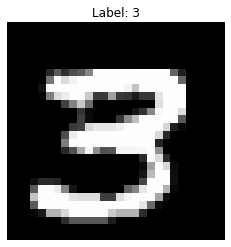

In [4]:
# Display an handwritten digit in the traijning set (change m to display another digit)
m = 111
plt.axis(False)
plt.title(f'Label: {training_labels[m]}')
plt.imshow(training_images[m], cmap='gray')
plt.show()

In [5]:
# Preprocessing the data
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images / 255.0

# Define the model
model = Sequential([
            Conv2D(64, (5,5), activation='relu', input_shape=(28, 28, 1)),
            MaxPooling2D(2, 2),
            Flatten(),
            Dense(128, activation='relu'),
            Dense(10, activation='softmax')
])

In [6]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# model fitting (train the model using the training set)
history = model.fit(training_images, training_labels, epochs=10, batch_size=64)

Epoch 1/10
938/938 [==============================] - 3s 3ms/step - loss: 0.1348 - accuracy: 0.9591
Epoch 2/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0450 - accuracy: 0.9857
Epoch 3/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0289 - accuracy: 0.9912
Epoch 4/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0193 - accuracy: 0.9939
Epoch 5/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0157 - accuracy: 0.9947
Epoch 6/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0104 - accuracy: 0.9967
Epoch 7/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0091 - accuracy: 0.9970
Epoch 8/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0066 - accuracy: 0.9979
Epoch 9/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0063 - accuracy: 0.9978
Epoch 10/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0051 - accuracy: 0.9984

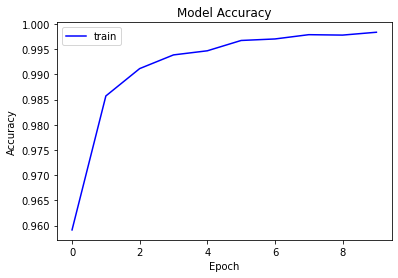

In [7]:
# Plot the performance of the model
plt.plot(history.history['accuracy'], 'b', label='train')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend(loc='best')
plt.show()

In [8]:
# Evaluate the performance of the trained model using the test set
score = model.evaluate(test_images, test_labels)
print(f'Loss: {score[0]:.4f}, accuracy: {score[1]:.4f}')

313/313 [==============================] - 1s 2ms/step - loss: 0.0504 - accuracy: 0.9873
Loss: 0.0504, accuracy: 0.9873


Predicted label: 7


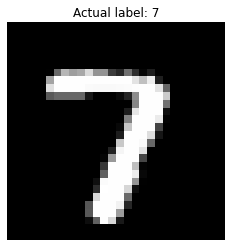

In [9]:
# Predict the label of a test image (change n to test another image)
n = 911
x = np.expand_dims(test_images[n], axis=0)
classes = model.predict(x)
print(f'Predicted label: {classes.argmax()}')

# Display the test image and show the actual label
plt.axis(False)
plt.title(f'Actual label: {test_labels[n]}')
plt.imshow(test_images[n].reshape(28, 28) * 255, cmap='gray')
plt.show()